In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [7]:
ra_df = pd.read_csv('data/race_predictor/running_ahead/log.txt', sep = '\t')
ra_df.head()

,Date,TimeOfDay,Type,SubType,Distance,DistanceUnit,Duration,Weight,WeightUnit,RestHR,...,ShoePrice,OverallPlace,FieldSize,GroupMinAge,GroupMaxAge,GroupPlace,GroupSize,GenderPlace,GenderSize,Unnamed: 37
0,2005-10-01,8:00 AM,Run,Race,3.10,Mile,0:23:53,108.0,lb,NaN,...,92.55,255.0,1480.0,20.0,24.0,9.0,76.0,NaN,NaN,NaN
1,2007-09-23,3:30 AM,Bike,Easy,10.20,Mile,1:00:00,102.0,lb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007-09-23,4:00 PM,Run,Easy,2.16,Mile,0:25:00,105.0,lb,NaN,...,109.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007-09-30,10:30 AM,Run,Easy,3.87,Mile,0:33:22,NaN,NaN,NaN,...,109.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007-10-03,4:00 PM,Spinning,Default,4.00,Mile,0:20:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
ra_df[ra_df['Type'] == 'Run'].shape

(461, 38)

In [11]:
boston = pd.read_csv('data/race_predictor/boston_marathon/marathon_results_2015.csv')

In [11]:
boston.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [12]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     26598 non-null  int64 
 1   Bib            26598 non-null  object
 2   Name           26598 non-null  object
 3   Age            26598 non-null  int64 
 4   M/F            26598 non-null  object
 5   City           26598 non-null  object
 6   State          24047 non-null  object
 7   Country        26598 non-null  object
 8   Citizen        1064 non-null   object
 9   Unnamed: 9     67 non-null     object
 10  5K             26598 non-null  object
 11  10K            26598 non-null  object
 12  15K            26598 non-null  object
 13  20K            26598 non-null  object
 14  Half           26598 non-null  object
 15  25K            26598 non-null  object
 16  30K            26598 non-null  object
 17  35K            26598 non-null  object
 18  40K            26598 non-n

In [12]:
#import time
#time.strptime("1:16:07","%H:%M:%S")
#sns.scatter()

boston[5] = pd.to_datetime(boston['5K'], format='%H:%M:%S', errors = "coerce")

In [ ]:
check_ins = ['5K', '10K', '15K', '20K', "Half", '25K', '30K', '35K', '40K', 'Proj Time', 'Official Time']



In [18]:
#sns.scatterplot(data = boston, x = [5]*26598, y = boston[5] )
boston[5].isnull().sum()

152

In [37]:
emissions = pd.read_excel('https://www.eia.gov/electricity/data/emissions/archive/xls/emissions2013.xlsx', header = 1, skipfooter = 2, sheet_name = None)

In [13]:
boston[5].shape

(26598,)

In [42]:
emissions['CO2']

,Plant Code,Plant Name,State,Sector Group,Sector Code,Prime Mover,Fuel Code,Aggregated Fuel Group,Generation (kWh),Useful Thermal Output (MMBtu),Total Fuel Consumption (MMBtu),Fuel Consumption for Electric Generation (MMBtu),\n Fuel Consumption for Useful Thermal Output (MMBtu),Quantity of Fuel Consumed,Fuel Units,Tons of CO2 Emissions,Metric Tonnes of CO2 Emissions
0,3,Barry,AL,ELECTRIC POWER,1,CA,NG,GAS,2813479000,0,588611,588611,0,575166,Mcf,3.443374e+04,3.123809e+04
1,3,Barry,AL,ELECTRIC POWER,1,CT,NG,GAS,5004417000,0,54371640,54371640,0,53116114,Mcf,3.180741e+06,2.885549e+06
2,3,Barry,AL,ELECTRIC POWER,1,ST,BIT,COAL,4962411861,0,51202482,51202482,0,2417558,Tons,5.263615e+06,4.775120e+06
3,3,Barry,AL,ELECTRIC POWER,1,ST,NG,GAS,116829139,0,1206368,1206368,0,1178044,Mcf,7.057253e+04,6.402298e+04
4,7,Gadsden,AL,ELECTRIC POWER,1,ST,BIT,COAL,82694496,0,1261795,1261795,0,52109,Tons,1.297125e+05,1.176744e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5634,99999,Partially Reporting Facilities,RI,COMMERCIAL,5,ST,DFO,PET,8563914,0,1083,1083,0,187,Barrels,8.734395e+01,7.923791e+01
5635,99999,Partially Reporting Facilities,TX,INDUSTRIAL,7,CA,NG,GAS,106313458,381442,1525670,755281,770389,1490293,Mcf,8.925170e+04,8.096861e+04
5636,99999,Partially Reporting Facilities,TX,INDUSTRIAL,7,CT,NG,GAS,788137809,104219,9923774,9551561,372213,9693603,Mcf,5.805408e+05,5.266631e+05
5637,99999,Partially Reporting Facilities,WI,ELECTRIC POWER,1,GT,NG,GAS,41126533,0,588151,588151,0,582327,Mcf,3.440683e+04,3.121367e+04


In [67]:
emissions = pd.DataFrame()
eia_years = list(range(2013,2019))
sheets = ['CO2','SO2','NOx']

for year in eia_years:
    dict_df = pd.read_excel(f'https://www.eia.gov/electricity/data/emissions/archive/xls/emissions{year}.xlsx', header = 1, skipfooter = 2, sheet_name = None)
    temp_df = dict_df[sheets[0]]
    cols = temp_df.columns
    for i in range(1,3):
        cols = dict_df[sheets[i]].columns
        temp_df = temp_df.merge(dict_df[sheets[i]][cols[:20]], on = list(cols[0:15]))
    temp_df['year'] = year
    emissions = emissions.append(temp_df)


In [71]:
temp_df = pd.read_excel('data/emissions/emissions2019.xlsx', header = 1, skipfooter = 2, sheet_name = None)
temp_df = dict_df[sheets[0]]
cols = temp_df.columns
for i in range(1,3):
    cols = dict_df[sheets[i]].columns
    temp_df = temp_df.merge(dict_df[sheets[i]][cols[:20]], on = list(cols[0:15]))
temp_df['year'] = 2019
emissions = emissions.append(temp_df)

In [75]:
emissions.columns = map(str.strip, emissions.columns)

In [77]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36830 entries, 0 to 5154
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Plant Code                                               36830 non-null  int64  
 1   Plant Name                                               36830 non-null  object 
 2   State                                                    36830 non-null  object 
 3   Sector Group                                             36830 non-null  object 
 4   Sector Code                                              36830 non-null  int64  
 5   Prime Mover                                              36830 non-null  object 
 6   Fuel Code                                                36830 non-null  object 
 7   Aggregated Fuel Group                                    36830 non-null  object 
 8   Generation (kWh)           

In [4]:
recipes = pd.read_csv('data/large_data/RAW_recipes.csv')

In [20]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
recipes['tags'] = recipes['tags'].apply(literal_eval)

In [54]:
tag_dist = recipes['tags'].explode().value_counts()
#tag_dist = recipes['tags'].apply(literal_eval).explode().value_counts()

In [55]:
tag_list = recipes['tags'].explode().unique()
#tag_list = recipes['tags'].apply(literal_eval).explode().unique()

(array([2.415383e+06, 7.843210e+05, 5.592460e+05, 2.050670e+05,
        8.709500e+04, 5.217500e+04, 2.472900e+04, 9.725000e+03,
        3.631000e+03, 3.160000e+02]),
 array([  0. ,  55.1, 110.2, 165.3, 220.4, 275.5, 330.6, 385.7, 440.8,
        495.9, 551. ]),
 <a list of 10 Patch objects>)

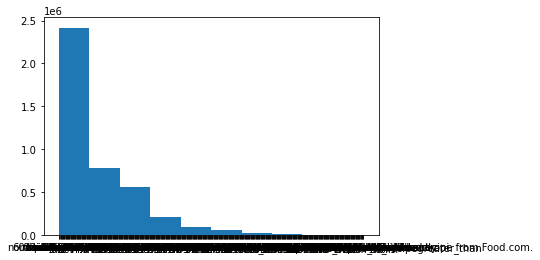

In [28]:
plt.hist(recipes['tags'].apply(literal_eval).explode())

In [53]:
tag_dist

array(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient',
       'cuisine', 'preparation', 'occasion', 'north-american',
       'side-dishes', 'vegetables', 'mexican', 'easy', 'fall',
       'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas',
       'seasonal', 'squash', '30-minutes-or-less', 'breakfast',
       'main-dish', 'pork', 'american', 'oven', 'kid-friendly', 'pizza',
       'northeastern-united-states', 'meat', 'equipment', 'chili',
       'crock-pot-slow-cooker', '4-hours-or-less', 'eggs-dairy',
       'potatoes', 'dinner-party', 'easter', 'cheese', 'stove-top',
       'new-years', 'thanksgiving', 'independence-day', 'st-patricks-day',
       'valentines-day', 'inexpensive', 'brunch', 'superbowl',
       'presentation', 'served-hot', 'weeknight', 'canning',
       'condiments-etc', 'heirloom-historical', 'amish-mennonite',
       'number-of-servings', 'technique', '15-minutes-or-less',
       'low-protein', '5-ingredients-or-less', 'beverages', '

In [30]:
tag_dist.loc['vegetarian']

35651

In [9]:
recipes["veg"] = [("vegan" in tag_list) or ("vegetarian" in tag_list) for tag_list in recipes["tags"]]
#'vegan' in recipes['tags']recipes['tags'].isin

In [11]:
recipes.shape

(231637, 13)

In [15]:
veg_recipes = recipes[recipes["veg"]].copy()

In [6]:
interactions = pd.read_csv('data/large_data/RAW_interactions.csv')

In [57]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [16]:
veg_recipes['ratings'] = [list(interactions[interactions['recipe_id'] == rec_id]['rating'])  for rec_id in veg_recipes['id'] ]

In [8]:
list(interactions[interactions['recipe_id'] == 137739]['rating'])

[5, 5, 5]

In [17]:
veg_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,veg,ratings
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,True,"[5, 5, 5]"
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,True,[5]
6,aww marinated olives,25274,15,21730,2002-04-14,"[15-minutes-or-less, time-to-make, course, mai...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9,True,[2]
16,chile rellenos,43026,45,52268,2002-10-14,"[60-minutes-or-less, time-to-make, course, mai...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,True,"[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 0, ..."
19,cream of cauliflower soup vegan,23850,110,3288,2002-03-28,"[lactose, weeknight, time-to-make, course, mai...","[174.2, 4.0, 24.0, 1.0, 15.0, 1.0, 10.0]",10,['heat the oil or margarine in a soup pot and ...,this is a dairy free,"['canola oil', 'onion', 'garlic', 'cauliflower...",16,True,[5]


In [43]:
# veggie recipes with more than 10 ratings
veg_recipes[veg_recipes['ratings'].map(len) > 10].describe()

,id,minutes,contributor_id,n_steps,n_ingredients,difficulty
count,3128.000000,3128.000000,3.128000e+03,3128.000000,3128.000000,3128.000000
mean,142169.992967,79.190217,1.624612e+05,8.831841,8.501918,159.666560
std,110971.657708,500.792949,2.163368e+05,5.544758,3.650987,507.822076
min,62.000000,0.000000,2.700000e+01,1.000000,2.000000,6.000000
25%,50842.750000,17.000000,3.744900e+04,5.000000,6.000000,60.000000
50%,117433.500000,31.000000,7.132400e+04,8.000000,8.000000,102.000000
75%,204854.750000,58.500000,2.097470e+05,11.000000,11.000000,167.000000
max,512584.000000,20190.000000,2.222923e+06,82.000000,25.000000,20254.000000


In [36]:
# veggie soups
veg_recipes[veg_recipes['name'].map(lambda x: 'soup' in x)]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,veg,ratings
19,cream of cauliflower soup vegan,23850,110,3288,2002-03-28,"[lactose, weeknight, time-to-make, course, mai...","[174.2, 4.0, 24.0, 1.0, 15.0, 1.0, 10.0]",10,['heat the oil or margarine in a soup pot and ...,this is a dairy free,"['canola oil', 'onion', 'garlic', 'cauliflower...",16,True,[5]
21,cream of spinach soup vegan,24701,55,3288,2002-04-08,"[60-minutes-or-less, time-to-make, course, mai...","[64.8, 3.0, 13.0, 54.0, 4.0, 2.0, 3.0]",10,"['in a 3 qt saucepan over medium high heat , s...",thickened with a mix of cooked oats and vegies...,"['onion', 'scallion', 'apple juice', 'olive oi...",12,True,"[2, 2]"
175,cream of pumpkin or squash soup vegan,164526,30,47892,2006-04-16,"[30-minutes-or-less, time-to-make, course, mai...","[89.3, 0.0, 35.0, 0.0, 4.0, 0.0, 7.0]",9,"['place all ingredients except for banana , ap...",the creaminess comes from cashew butter (and b...,"['pumpkin puree', 'vegetable broth', 'small re...",14,True,"[5, 5]"
176,cream of mushroom soup,50184,40,20477,2003-01-07,"[60-minutes-or-less, time-to-make, course, mai...","[473.2, 59.0, 23.0, 7.0, 28.0, 36.0, 8.0]",8,"['in a 4 quart pot , saut the mushrooms in but...","when i was vegan, i missed good cream soups. t...","['mushrooms', 'margarine', 'garlic cloves', 'd...",9,True,"[5, 5, 5, 0, 5]"
178,creamy vegan potato leek soup,343338,40,451456,2008-12-13,"[lactose, 60-minutes-or-less, time-to-make, co...","[183.0, 3.0, 10.0, 0.0, 13.0, 1.0, 11.0]",10,"['heat olive oil in a 4-quart pot', 'sautee th...",adapted from alex jamieson's great american de...,"['olive oil', 'leeks', 'garlic cloves', 'russe...",8,True,"[5, 4, 4, 5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230899,zucchini and basil soup,164350,40,197023,2006-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[211.5, 12.0, 25.0, 0.0, 10.0, 13.0, 10.0]",14,['saut the onion in a large pan over a gentle ...,"a quick-to-prepare, low fat, inexpensive and y...","['onions', 'olive oil', 'potatoes', 'zucchini'...",12,True,"[5, 5, 5, 5, 5, 0, 5, 5, 5, 5]"
231013,zucchini basil soup,464764,60,2014851,2011-09-24,"[60-minutes-or-less, time-to-make, course, mai...","[183.6, 16.0, 33.0, 38.0, 8.0, 29.0, 6.0]",4,"['in a large saucepan , saut chopped onion in ...",excelent for vegetarians!,"['zucchini', 'onion', 'butter', 'vegetable sou...",6,True,[5]
231151,zucchini egg lemon soup,326435,35,225426,2008-09-22,"[60-minutes-or-less, time-to-make, course, mai...","[132.4, 13.0, 7.0, 1.0, 7.0, 7.0, 3.0]",16,['put oil in a deep saucepan over medium-high ...,i found this recipe by mark bittman for the ne...,"['extra virgin olive oil', 'onion', 'short-gra...",9,True,"[5, 1]"
231595,zuppa sarda sardinian cheese and egg soup wit...,89330,30,94272,2004-04-18,"[30-minutes-or-less, time-to-make, course, mai...","[733.4, 65.0, 12.0, 46.0, 71.0, 78.0, 17.0]",10,"['preheat oven to 350 degrees f', 'brush bread...","so easy, this cheesy italian comfort food is d...","['french bread', 'olive oil', 'garlic', 'low s...",9,True,[5]


In [40]:
veg_recipes['difficulty'] = veg_recipes['n_steps'] * veg_recipes['n_ingredients'] + veg_recipes['minutes']

In [39]:
veg_recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients,difficulty
count,35651.000000,35651.000000,3.565100e+04,35651.000000,35651.000000,35651.000000
mean,221227.014221,125.439511,3.035578e+06,9.088104,8.866259,88.765084
std,142232.105577,2251.209220,7.193464e+07,5.618244,3.689081,83.359181
min,41.000000,0.000000,2.700000e+01,1.000000,1.000000,2.000000
25%,100227.000000,17.000000,4.789200e+04,5.000000,6.000000,35.000000
50%,200168.000000,30.000000,1.754050e+05,8.000000,8.000000,65.000000
75%,339638.000000,60.000000,3.681390e+05,12.000000,11.000000,117.000000
max,536547.000000,259260.000000,2.002234e+09,82.000000,31.000000,1254.000000


In [46]:
veg_ingredients = veg_recipes['ingredients'].apply(literal_eval).explode().unique()

In [49]:
veg_ingredients.shape

(7417,)